In [10]:
#First Implementation with Boosted Decision Tree
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Data is stored in pandas -> Each 

In [130]:
data=pd.read_csv('data/ML_data.csv',header=[0,1])
valid=pd.read_csv('data/Valid_data.csv')

In [131]:
data.head()

j1p4                                    j2p4                      \
         pt       phi       eta       mass       pt       phi       eta   
0  122.6875 -2.919922  0.445801  12.101562  87.8750 -0.455444  1.209473   
1  122.6875 -2.919922  0.445801  12.101562  87.8750 -0.455444  1.209473   
2  122.6875 -2.919922  0.445801  12.101562  87.8750 -0.455444  1.209473   
3  122.6875 -2.919922  0.445801  12.101562  44.4375  1.443604  0.696289   
4  122.6875 -2.919922  0.445801  12.101562  44.4375  1.443604  0.696289   

                 j3p4                                              dR12  \
       mass        pt       phi       eta      mass Unnamed: 12_level_1   
0  9.109375  44.43750  1.443604  0.696289  9.109375            2.580086   
1  9.109375  36.21875 -3.072266  1.402100  9.109375            2.580086   
2  9.109375  31.90625 -0.616455  0.261414  9.109375            2.580086   
3  4.214844  36.21875 -3.072266  1.402100  4.214844            1.935933   
4  4.214844  31.90625 -0.616455  0.261414  4.214844            1.935933   

                 dR13                dR23              j1btag  \
  Unnamed: 13_level_1 Unnamed: 14_level_1 Unnamed: 15_level_1   
0            1.935933            1.967166            0.980957   
1            0.968357            2.623902            0.980957   
2            2.310835            0.961634            0.980957   
3            0.968357            1.903044            0.980957   
4            2.310835            2.105459            0.980957   

               j2btag              j3btag  
  Unnamed: 16_level_1 Unnamed: 17_level_1  
0            0.980957            0.980957  
1            0.980957            0.980957  
2            0.980957            0.980957  
3            0.980957            0.980957  
4            0.980957            0.980957

In [203]:
combdata=data.join(valid)
valid["values"]=valid["values"].astype(int)

C:\Users\zshel\anaconda3\envs\py38\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [133]:
combdata.head()

,"(j1p4, pt)","(j1p4, phi)","(j1p4, eta)","(j1p4, mass)","(j2p4, pt)","(j2p4, phi)","(j2p4, eta)","(j2p4, mass)","(j3p4, pt)","(j3p4, phi)","(j3p4, eta)","(j3p4, mass)","(dR12, Unnamed: 12_level_1)","(dR13, Unnamed: 13_level_1)","(dR23, Unnamed: 14_level_1)","(j1btag, Unnamed: 15_level_1)","(j2btag, Unnamed: 16_level_1)","(j3btag, Unnamed: 17_level_1)",values
0,122.6875,-2.919922,0.445801,12.101562,87.8750,-0.455444,1.209473,9.109375,44.43750,1.443604,0.696289,9.109375,2.580086,1.935933,1.967166,0.980957,0.980957,0.980957,0
1,122.6875,-2.919922,0.445801,12.101562,87.8750,-0.455444,1.209473,9.109375,36.21875,-3.072266,1.402100,9.109375,2.580086,0.968357,2.623902,0.980957,0.980957,0.980957,0
2,122.6875,-2.919922,0.445801,12.101562,87.8750,-0.455444,1.209473,9.109375,31.90625,-0.616455,0.261414,9.109375,2.580086,2.310835,0.961634,0.980957,0.980957,0.980957,0
3,122.6875,-2.919922,0.445801,12.101562,44.4375,1.443604,0.696289,4.214844,36.21875,-3.072266,1.402100,4.214844,1.935933,0.968357,1.903044,0.980957,0.980957,0.980957,0
4,122.6875,-2.919922,0.445801,12.101562,44.4375,1.443604,0.696289,4.214844,31.90625,-0.616455,0.261414,4.214844,1.935933,2.310835,2.105459,0.980957,0.980957,0.980957,0


In [134]:
data.describe()

j1p4                                                    j2p4  \
                 pt           phi           eta          mass            pt   
count  65243.000000  65243.000000  65243.000000  65243.000000  65243.000000   
mean     120.951467     -0.013150     -0.018808     14.601349     73.657136   
std       75.995406      1.822239      1.104715      9.955518     37.087459   
min       31.000000     -3.141602     -2.399902     -0.063965     30.171875   
25%       75.406250     -1.565918     -0.848389      9.140625     49.906250   
50%      101.562500     -0.021343     -0.029114     12.445312     63.906250   
75%      142.000000      1.567139      0.810425     17.125000     85.968750   
max      781.000000      3.141113      2.399902    166.375000    618.500000   

                                                         j3p4                \
                phi           eta          mass            pt           phi   
count  65243.000000  65243.000000  65243.000000  65243.000000  65243.000000   
mean       0.001060     -0.024523     10.006595     47.535883      0.018645   
std        1.810573      1.136141      5.051506     18.574002      1.806970   
min       -3.141602     -2.399902     -0.039520     30.015625     -3.140625   
25%       -1.577393     -0.888550      6.957031     35.125000     -1.522461   
50%        0.005794     -0.036575      9.054688     42.093750      0.044426   
75%        1.559448      0.832275     11.921875     53.750000      1.567383   
max        3.140625      2.399902    103.500000    297.000000      3.140625   

                                                 dR12                dR13  \
                eta          mass Unnamed: 12_level_1 Unnamed: 13_level_1   
count  65243.000000  65243.000000        65243.000000        65243.000000   
mean      -0.010797     10.006595            2.322958            2.228579   
std        1.171033      5.051506            0.894254            0.895954   
min       -2.399902     -0.039520            0.398385            0.406477   
25%       -0.902588      6.957031            1.628897            1.523072   
50%       -0.018311      9.054688            2.434058            2.267650   
75%        0.882324     11.921875            2.997453            2.907999   
max        2.399902    103.500000            5.401912            5.269093   

                     dR23              j1btag              j2btag  \
      Unnamed: 14_level_1 Unnamed: 15_level_1 Unnamed: 16_level_1   
count        65243.000000        65243.000000        65243.000000   
mean             2.221670           -0.050889           -0.050889   
std              0.889444            2.329585            2.329585   
min              0.398385          -10.000000          -10.000000   
25%              1.528022            0.107300            0.107300   
50%              2.236133            0.302002            0.302002   
75%              2.894433            0.904785            0.904785   
max              5.401912            0.999512            0.999512   

                   j3btag  
      Unnamed: 17_level_1  
count        65243.000000  
mean            -0.050889  
std              2.329585  
min            -10.000000  
25%              0.107300  
50%              0.302002  
75%              0.904785  
max              0.999512

In [135]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt 

In [204]:
data_dmatrix = xgb.DMatrix(data=data,label=valid)

In [137]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(data, valid, test_size=0.2, random_state=1997)

In [206]:
len(y_test)

13049

In [211]:
xgbr  = xgb.XGBRegressor(objective='binary:logistic',learning_rate=.1,max_depth=20,n_estimator=5,missing=0) 

In [212]:
xgbr.fit(X_train, y_train)  
#preds = xg_reg.predict(X_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=20,
             min_child_weight=1, missing=0, monotone_constraints='()',
             n_estimator=5, n_estimators=100, n_jobs=16, num_parallel_tree=1,
             objective='binary:logistic', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [222]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9489048828011063


In [224]:
params={"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

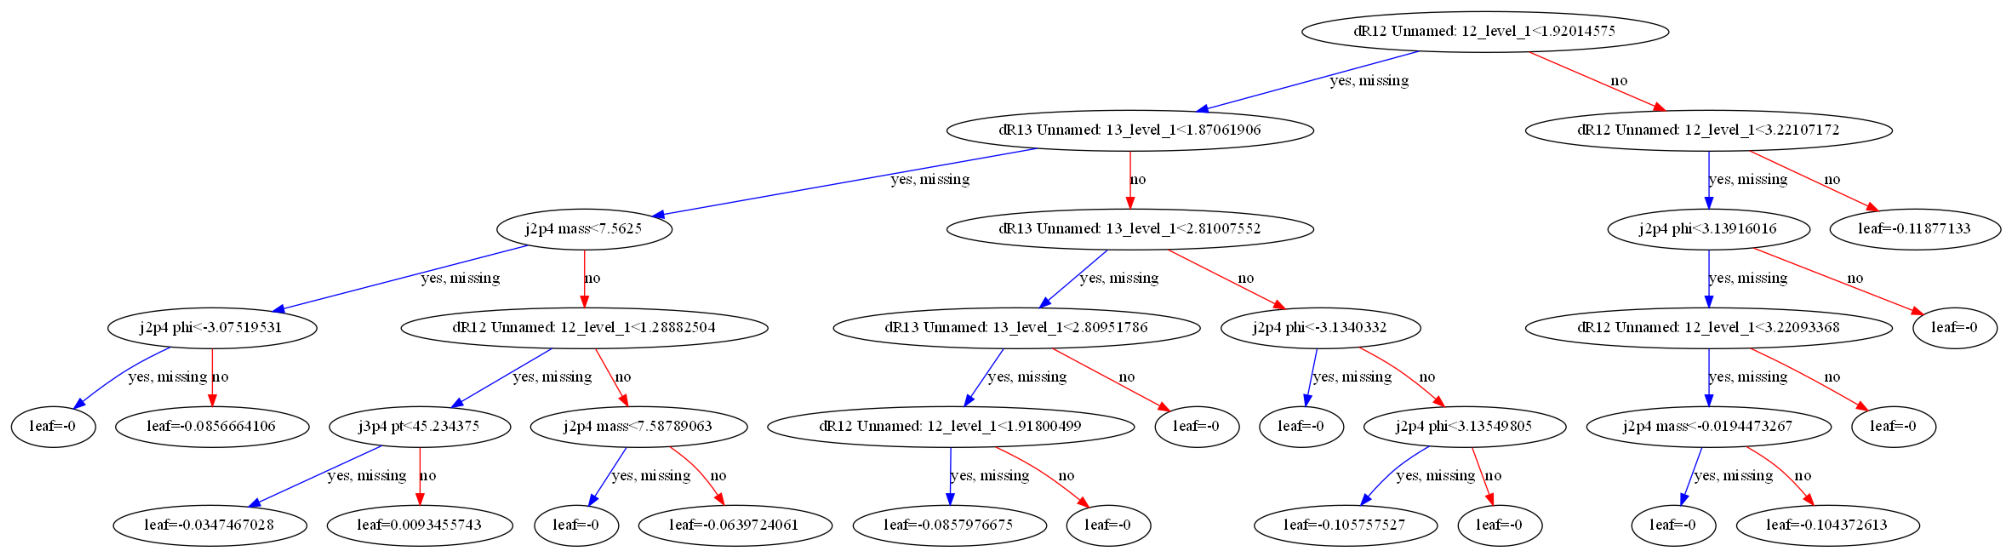

In [227]:
xgb.plot_tree(xg_reg,num_trees=9)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

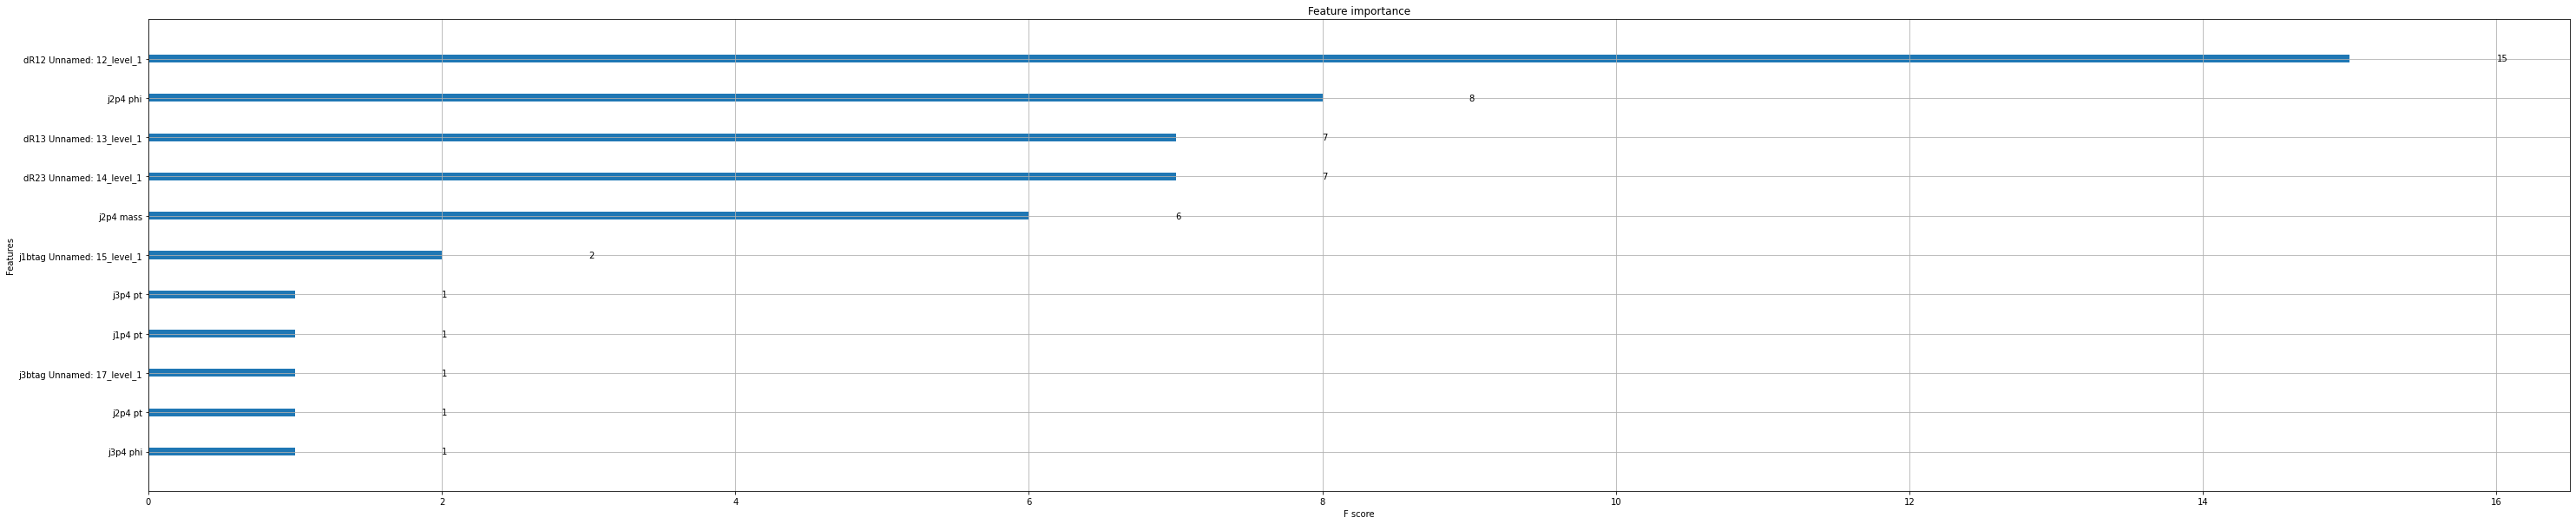

In [228]:
xgb.plot_importance(xg_reg)

In [75]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[11:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [229]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.496051,0.000017,0.496047,0.000011
1,0.492130,0.000023,0.492134,0.000026
2,0.488276,0.000039,0.488279,0.000034
3,0.484451,0.000052,0.484457,0.000044
4,0.480689,0.000066,0.480692,0.000052


In [230]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.352553
Name: test-rmse-mean, dtype: float64
